In [1]:
# Step 1: Import required libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

print("TensorFlow version:", tf.__version__)


Matplotlib is building the font cache; this may take a moment.


TensorFlow version: 2.12.0


In [2]:
# Step 2: Load and preprocess the MNIST dataset

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape for CNN input (samples, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Check shapes
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)


11490434/11490434 [==============================] - 4s 0us/step
x_train: (60000, 28, 28, 1)
y_train: (60000, 10)


In [3]:
# Step 3: Build a Convolutional Neural Network (CNN)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [4]:
# Step 4: Train the model

history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)


Epoch 1/5
422/422 [==============================] - 41s 93ms/step - loss: 0.2238 - accuracy: 0.9354 - val_loss: 0.0710 - val_accuracy: 0.9795
Epoch 2/5
422/422 [==============================] - 45s 106ms/step - loss: 0.0588 - accuracy: 0.9824 - val_loss: 0.0516 - val_accuracy: 0.9867
Epoch 3/5
422/422 [==============================] - 43s 102ms/step - loss: 0.0421 - accuracy: 0.9867 - val_loss: 0.0391 - val_accuracy: 0.9880
Epoch 4/5
422/422 [==============================] - 44s 105ms/step - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.0350 - val_accuracy: 0.9892
Epoch 5/5
422/422 [==============================] - 44s 103ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0392 - val_accuracy: 0.9893


In [5]:
# Step 5: Evaluate model on test set

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


313/313 [==============================] - 3s 9ms/step - loss: 0.0360 - accuracy: 0.9884
Test Accuracy: 98.84%


313/313 [==============================] - 3s 8ms/step


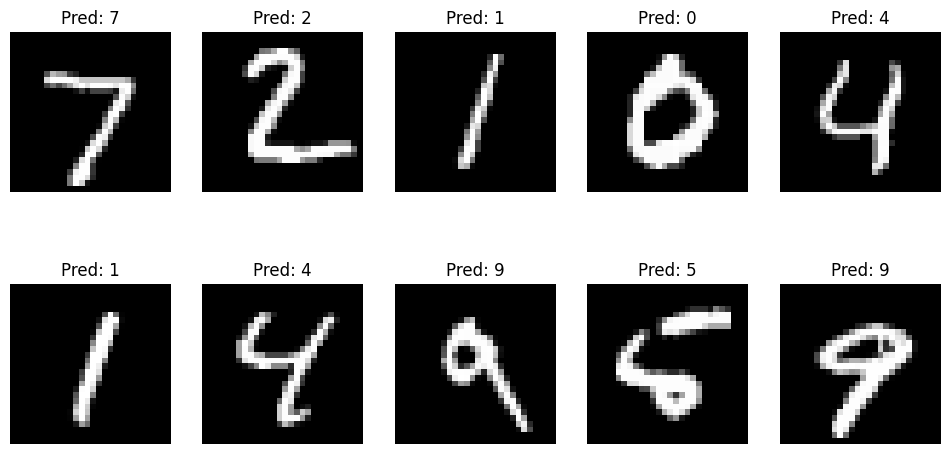

In [6]:
# Step 6: Visualize predictions

predictions = model.predict(x_test)

plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()


In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def predict_digit(image_path, model):
    """
    Predict a handwritten digit from an image using a trained CNN model.
    
    Parameters:
    - image_path: str, path to the image file
    - model: trained Keras model
    """
    # Load and preprocess image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28,28))  # Resize to MNIST size
    img_array = np.array(img)
    
    # Invert colors if needed (MNIST digits are white on black)
    if np.mean(img_array) > 127:  # if background is white
        img_array = 255 - img_array
    
    # Normalize and reshape for model input
    img_array = img_array.astype('float32') / 255.0
    img_array = img_array.reshape(1,28,28,1)
    
    # Predict
    prediction = model.predict(img_array)
    digit = np.argmax(prediction)
    
    # Display image and prediction
    plt.imshow(img_array.reshape(28,28), cmap='gray')
    plt.title(f"Predicted Digit: {digit}")
    plt.axis('off')
    plt.show()
    
    return digit


1/1 [==============================] - 0s 32ms/step


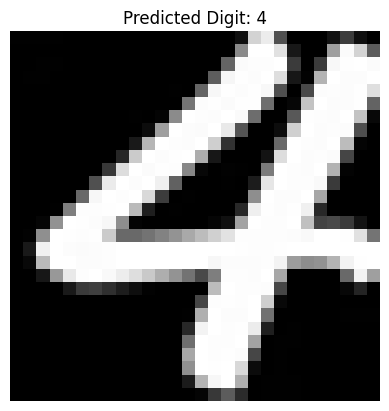

Predicted digit is: 4


In [15]:
predicted_digit = predict_digit("test_digits/Screenshot 2025-10-04 010726.png", model)
print("Predicted digit is:", predicted_digit)

1/1 [==============================] - 0s 34ms/step


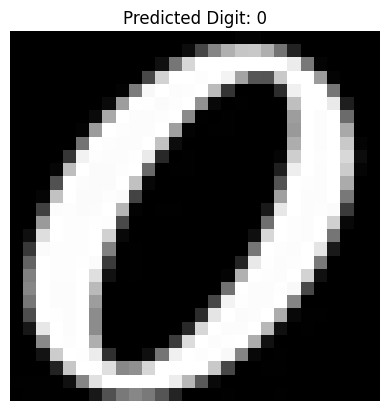

Screenshot 2025-10-04 010615.png --> Predicted digit: 0

1/1 [==============================] - 0s 39ms/step


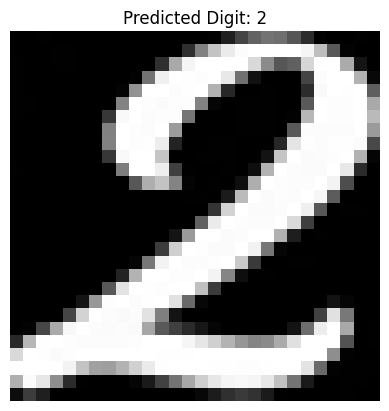

Screenshot 2025-10-04 010653.png --> Predicted digit: 2

1/1 [==============================] - 0s 34ms/step


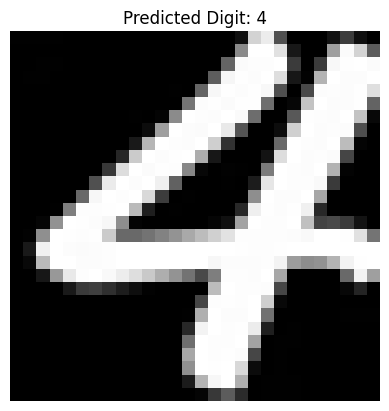

Screenshot 2025-10-04 010726.png --> Predicted digit: 4

1/1 [==============================] - 0s 31ms/step


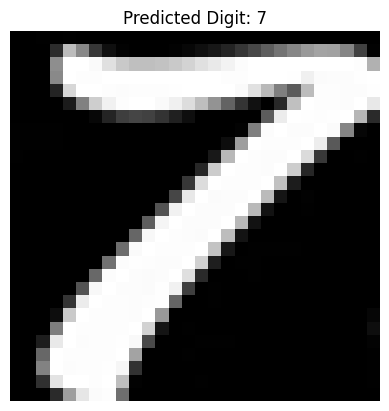

Screenshot 2025-10-04 010743.png --> Predicted digit: 7



In [16]:
import os

# Folder containing your test images
image_folder = "test_digits"  # or full path like "A:/jupyter notebook/test_digits"

# Loop through all images in the folder
for image_file in os.listdir(image_folder):
    if image_file.lower().endswith((".png", ".jpg", ".jpeg")):
        image_path = os.path.join(image_folder, image_file)
        predicted_digit = predict_digit(image_path, model)
        print(f"{image_file} --> Predicted digit: {predicted_digit}\n")
